The Spark Foundation-Data Science & Business Analytics Internship

Name : K RAHUL NAIK

Batch : GRIPJULY21

Task 6 : Create the Decision Tree classifier and visualize it graphically.

Objective : The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.






IMPORTING NECESSARY LIBRARIES

In [1]:
##Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt





IMPORTING THE DATA

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
print(dataset)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]







DATA ANALYSIS

In [4]:
## Import Dataset
def importdata():
    iris = datasets.load_iris()
    dataset = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    dataset.reset_index(inplace=True)
    ##Printing the dataset shape
    print("Datset Length",len(dataset))
    print("Dataset shape",dataset.shape)
    print("Dataset:",dataset.head())
    return dataset




SPLITTING THE DATA INTO TRAINING AND TRAINING SETS


In [5]:

##function to split the dataset
def splitdataset(dataset):
    x=dataset.values[:,1:4]
    y=dataset.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    return x,y,x_train,x_test,y_train,y_test

In [6]:
##function to perform training with giniIndex
def train_using_gini(x_train,x_test,y_train):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=3,min_samples_leaf=5)
    #performing training
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [7]:
##Function to perform training with entropy
def train_using_entropy(x_train,x_test,y_train):
    ##decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3,min_samples_leaf=5)
    
    ##performing training
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [8]:
##function to make predictions
def prediction(x_test,clf_object):
    ##Prediction on test with giniindex
    y_pred=clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [9]:
##Function to calculate accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*0)
    print("Report:",classification_report(y_test,y_pred))

In [10]:
##Driver code
def main():
    #Building phase
    dataset=importdata()
    x,y,x_train,x_test,y_train,y_test=splitdataset(dataset)
    clf_gini=train_using_gini(x_train,x_test,y_train)
    clf_entropy=train_using_entropy(x_train,x_test,y_train)
    #operational phase
    print('\n')
    print("Results using Gini Index:")
    
    
    #Prediction using gini
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    
    
    #Prediction using entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    cal_accuracy(y_test,y_pred_entropy)

#Calling main function
if __name__=="__main__":
    main();

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


Results using Gini Index:
Predicted values:
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 2. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 0. 2. 0. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
Accuracy: 0.0
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.85      0.94      




VISUALIZING THE DECISION TREE 


I had trained the DecisionTreeClassifier on iris dataset. I am going to use default hyper-parameters for the classifier.

In [11]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)




PRINT TEXT REPRESENTATION


Exporting Decision Tree to the text representation

In [14]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2





TO SAVE THE FILE THE FOLLOWING CODE WILL BE USEFUL


In [15]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)




Plot Tree with plot_tree


It requires matplotlib to be installed

 
 
 It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) 
 

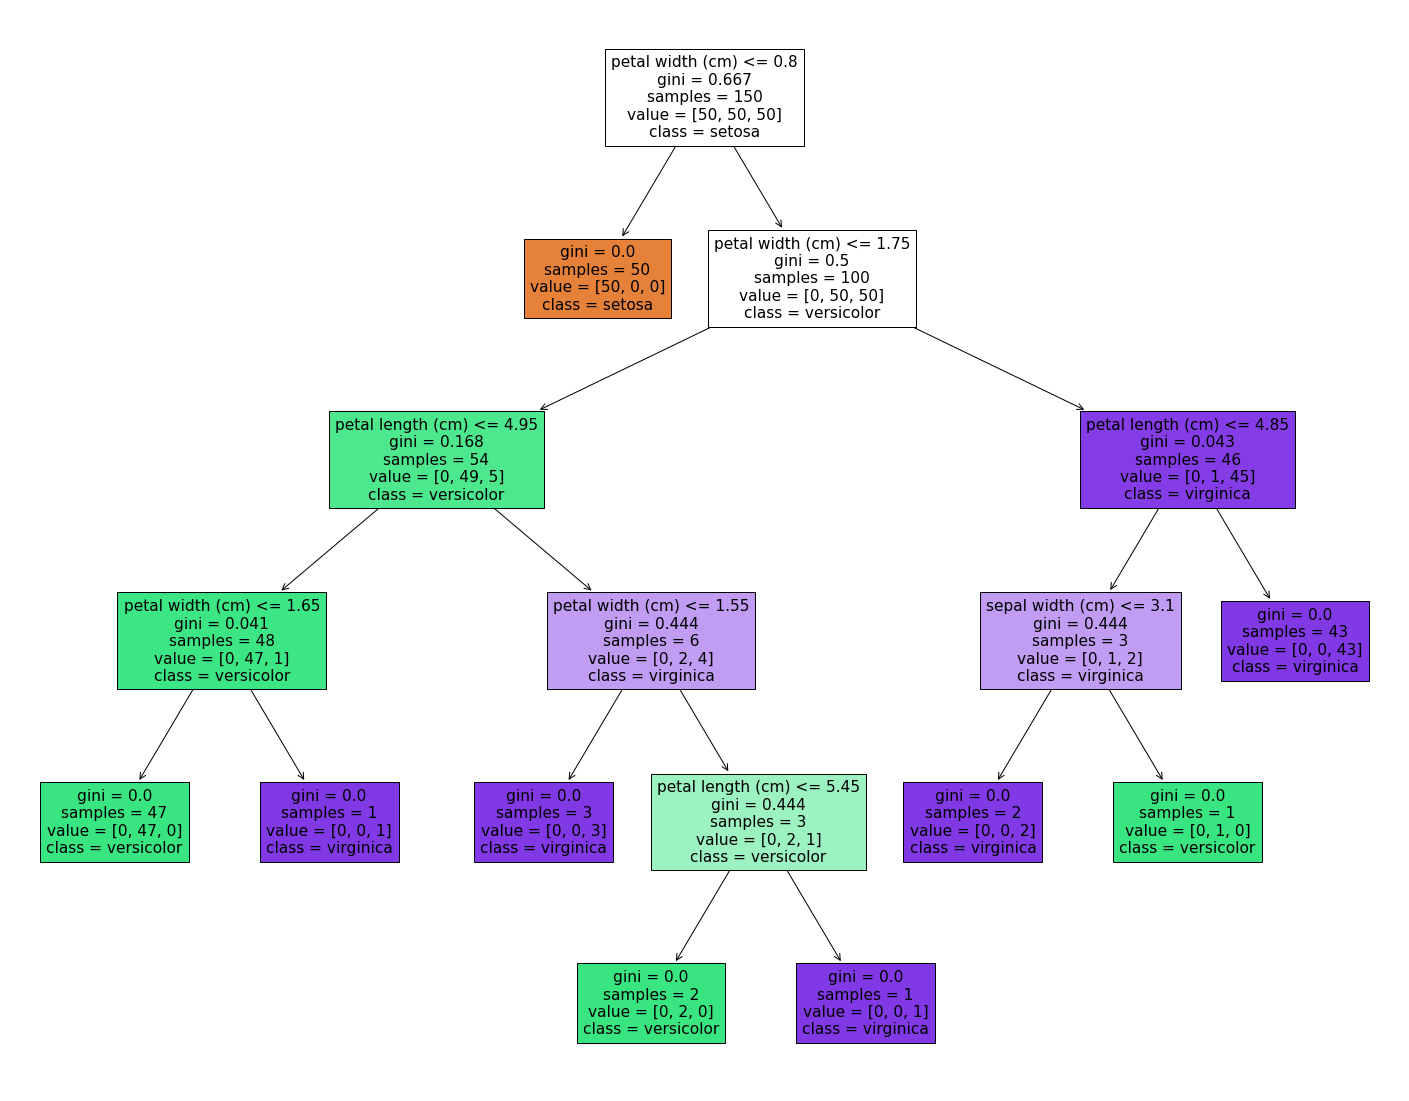

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

To save the figure to the .png file:

In [17]:
fig.savefig("decistion_tree.png")